In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv('data_final.csv')

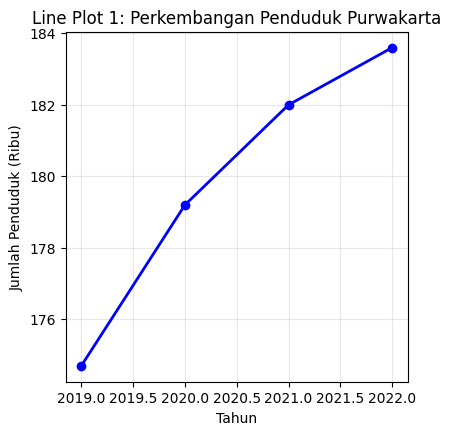

In [18]:
# 2. LINE PLOT 1: Perkembangan Jumlah Penduduk Purwakarta
purwakarta_data = df[df['Kecamatan'] == 'Purwakarta']
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.plot(purwakarta_data['Tahun'], purwakarta_data['Jumlah Penduduk (Ribu)'], 
         marker='o', linewidth=2, color='blue')
plt.title('Line Plot 1: Perkembangan Penduduk Purwakarta')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk (Ribu)')
plt.grid(True, alpha=0.3)

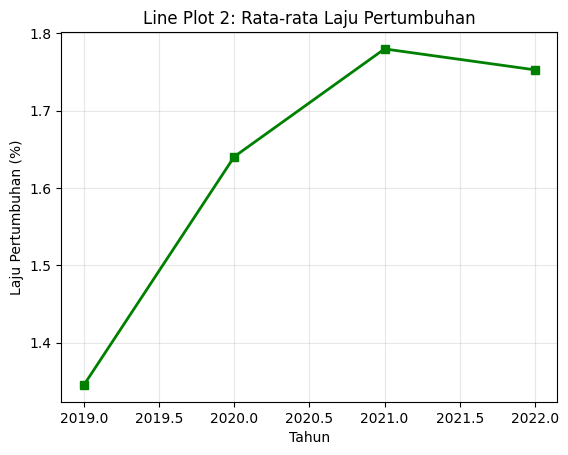

In [19]:
# 3. LINE PLOT 2: Rata-rata Laju Pertumbuhan
tahun_group = df.groupby('Tahun')['Laju Pertumbuhan Penduduk per Tahun'].mean()
plt.subplot(1, 1, 1)
plt.plot(tahun_group.index, tahun_group.values, marker='s', color='green', linewidth=2)
plt.title('Line Plot 2: Rata-rata Laju Pertumbuhan')
plt.xlabel('Tahun')
plt.ylabel('Laju Pertumbuhan (%)')
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Pie Chart 1: 5 Kecamatan Terbesar (2022)')

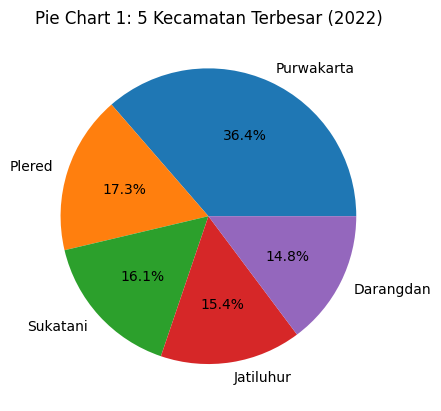

In [20]:
# 6. PIE CHART 1: Distribusi Persentase 2022
df_2022 = df[df['Tahun'] == 2022]
df_top5 = df_2022.nlargest(5, 'Persentase Penduduk')

plt.subplot(1, 1, 1)
plt.pie(df_top5['Persentase Penduduk'], 
        labels=df_top5['Kecamatan'], 
        autopct='%1.1f%%')
plt.title('Pie Chart 1: 5 Kecamatan Terbesar (2022)')

In [21]:
def kategori_kepadatan(nilai):
    if nilai < 500:
        return "Rendah"
    elif 500 <= nilai <= 1500:
        return "Sedang"
    else:
        return "Tinggi"

In [22]:
df['Kategori_Kepadatan'] = df['Kepadatan Penduduk per km persegi Km2'].apply(kategori_kepadatan)


In [23]:
encoding_map = {'Rendah': 0, 'Sedang': 1, 'Tinggi': 2}
df['Kategori_Kepadatan_Encoded'] = df['Kategori_Kepadatan'].map(encoding_map)

In [24]:
features = ['Jumlah Penduduk (Ribu)', 'Persentase Penduduk', 
            'Laju Pertumbuhan Penduduk per Tahun',
            'Rasio Jenis Kelamin Penduduk', 'Luas Wilayah (Km2)']

X = df[features]
y = df['Kepadatan Penduduk per km persegi Km2'] 

In [25]:
df

,Kecamatan,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi Km2,Rasio Jenis Kelamin Penduduk,Luas Wilayah (Km2),Tahun,Kategori_Kepadatan,Kategori_Kepadatan_Encoded
0,Jatiluhur,69.9,2.22,0.14,1165,101.0,60.11,2019,Sedang,1
1,Sukasari,15.9,1.35,0.03,174,105.0,92.01,2019,Rendah,0
2,Maniis,33.1,1.31,0.07,462,104.0,71.64,2019,Rendah,0
3,Tegal Waru,50.4,1.40,0.10,688,104.0,73.23,2019,Sedang,1
4,Plered,79.4,2.57,0.16,2521,103.0,31.48,2019,Tinggi,2
...,...,...,...,...,...,...,...,...,...,...
63,Purwakarta,183.6,0.89,17.56,7394,101.0,24.83,2022,Tinggi,2
64,Babakancikao,64.1,2.39,6.13,1513,99.5,42.40,2022,Tinggi,2
65,Campaka,53.5,2.15,5.12,1227,101.5,43.60,2022,Sedang,1
66,Cibatu,32.7,1.55,3.12,578,100.1,56.50,2022,Sedang,1


In [26]:
# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
# Menampilkan intercept regresi dari model
intercept = model.intercept_
intercept


np.float64(1315.081402017806)

In [30]:
# Menampilkan koefisien regresi dari model
coefficients = model.coef_
coefficients


array([1216.27706341,  -23.79526717, -134.73850589,  127.7637938 ,
       -405.67317349])

In [31]:
input_data = np.array([[
    50.0,   # Jumlah Penduduk (Ribu)
    5.0,    # Persentase Penduduk (%)
    0.68,  # laju pertumbuhan
    103.0,  # Rasio Jenis Kelamin
    100.0   # Luas Wilayah (km²)
]])

In [32]:
input_data_scaled = scaler.transform(input_data)

c:\Users\revir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
predicted_density = model.predict(input_data_scaled)[0]

In [34]:
kategori_prediksi = kategori_kepadatan(predicted_density)

In [35]:

y_pred = model.predict(X_test)


In [36]:
# Menghitung MSE dan R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [37]:
# Menampilkan MSE dan R2 score
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 211479.10564974256
R-squared (R2): 0.9556472785537712


In [38]:
# Menyimpan model menggunakan pickle
import pickle

filename = 'regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))